Exercise 3.3 
Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then
use it to make a wave with duration 1 s and frame rate 20 kHz. Draw a
sketch of what you think the spectrum will look like. Then plot the spectrum
and see if you got it right.

In [4]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import math
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

PI2 = 2 * math.pi

2500과 3000Hz 사이를 Linear Chirp하기 때문에 스펙트럼의 모양은 탑 모양으로 나타날 것이라고 생각한다.

In [5]:
class SawtoothChirp(thinkdsp.Chirp):
    def _evaluate(self, ts, freqs):
        dts = np.diff(ts) #ts 값의 각 요소들 간의 차이계산.(미분)
        dphis = PI2 * freqs * dts #dts, 간격 동안 위상이 얼마나 변화하는 지 파악.
        phases = np.cumsum(dphis)
        phases = np.insert(phases, 0,0)
        
        cycles = phases/PI2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

In [6]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000) #지속시간 1, 20Khz의 프레임 속도
wave.make_audio()

wave 소리는 마치 우주에서 날아온 신호 소리를 듣는것과 같다.

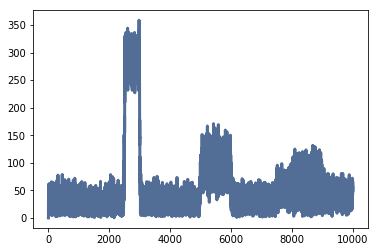

In [16]:
wave.make_spectrum().plot()

예상한 대로 스펙트럼의 모양은 탑모양의 모습을 보인다.
다음 고조파는 5000에서 6000Hz까지 Sweep 하므로 좀 짧은 탑을 볼 수 있고,
다음 고조파는 7500에서 9000Hz까지 주파수가 높아질 수록 짧아지는 것을 볼 수 있다.